# Szymon Szewczyk ML

## kNN - own implementation

k:1, error: 0.0889
k:2, error: 0.0444
k:3, error: 0.0667
k:4, error: 0.0444
k:5, error: 0.0667
k:6, error: 0.0444
k:7, error: 0.0222
k:8, error: 0.0667
k:9, error: 0.0444


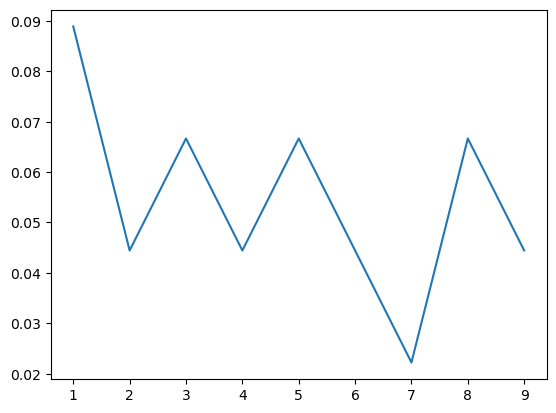

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import collections
from sklearn import datasets
from sklearn.model_selection import train_test_split
from scipy.spatial import distance
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris

irisRaw = load_iris()
iris = pd.DataFrame(data= np.c_[irisRaw['data'], irisRaw['target']],
                     columns= irisRaw['feature_names'] + ['target'])

x = irisRaw.data
y = irisRaw.target
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=30)

def neighbors(train, test, k):
    dist = []
    for row in train:
        length = distance.euclidean(test, row)
        dist.append((row, length))
    dist.sort(key=lambda el: el[1])
    return [dist[i][0] for i in range(k)]

def kNN(x_train, y_train, test, k):
    lst = neighbors(x_train, test, k)
    values = []
    for x_row, y_row in zip(x_train, y_train):
        for el in lst:
            if collections.Counter(el) == collections.Counter(x_row):
                values.append(y_row)
    return collections.Counter(values).most_common()[0][0]

accuracy = []
k_el = [1,2,3,4,5,6,7,8,9]
for k in range(1,10):
    pred = []
    for el in x_test:
        pred.append(kNN(x_train, y_train, el, k))
    accuracy.append(1-accuracy_score(y_pred=pred, y_true=y_test))
    print('k:{}, error: {:.4f}'.format(k, 1-accuracy_score(pred, y_test)))

plt.plot(k_el, accuracy)

## kNN - sklearn

k:1, error: 0.0000
k:2, error: 0.0222
k:3, error: 0.0667
k:4, error: 0.0667
k:5, error: 0.0444
k:6, error: 0.0222
k:7, error: 0.0444
k:8, error: 0.0222
k:9, error: 0.0222


c:\Users\szyme\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\szyme\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

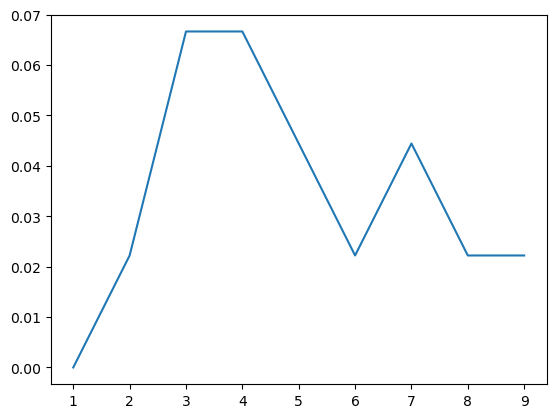

In [2]:
from sklearn.neighbors import KNeighborsClassifier

error = []
for k in range(1,10):
    knn = KNeighborsClassifier(k)
    knn.fit(x, y)
    pred = knn.predict(x_test)
    error.append(1-accuracy_score(y_pred=pred, y_true=y_test))
    print('k:{}, error: {:.4f}'.format(k, 1-accuracy_score(pred, y_test)))

plt.plot(k_el, error)
plt.show()

## Decision Trees

In [3]:
from sklearn.datasets import load_iris
from sklearn import tree
from six import StringIO  
import pydot 

iris = load_iris()
clf = tree.DecisionTreeClassifier()
clf.fit(iris.data, iris.target)

clf.predict(iris.data[:1, :])

clf.predict_proba(iris.data[:1, :])

dot_data = StringIO() 
tree.export_graphviz(clf, out_file=dot_data) 
graph = pydot.graph_from_dot_data(dot_data.getvalue()) 
graph[0].write("iris.pdf")

True

In [23]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, f1_score, ConfusionMatrixDisplay
from sklearn import tree
from sklearn.model_selection import train_test_split
from scipy.io import loadmat


# Load data
dane = loadmat('mnist.mat')

# #Ex.1.Divide the data into parameters X and answer y: 
X = dane['data'].T
y = dane['label'].T

# Standardization
for i in range(X.shape[0]):
    X[i,:] = X[i,:]/np.std(X[i,:])
 
# Convert digit 10 -> 0 (error in the dataset)    
y[np.where(y==10)]=0
 
# the height and width of the picture with the number
h = 28
w = 28
 
# Ex 2. Please display the number of digits and the number of pixels per image
print("Number of digits: {}".format(X.shape[0]))
print("Number of pixels per image: {}".format(X.shape[1]))

Number of digits: 70000
Number of pixels per image: 784


c:\Users\szyme\anaconda3\lib\site-packages\matplotlib\text.py:1223: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


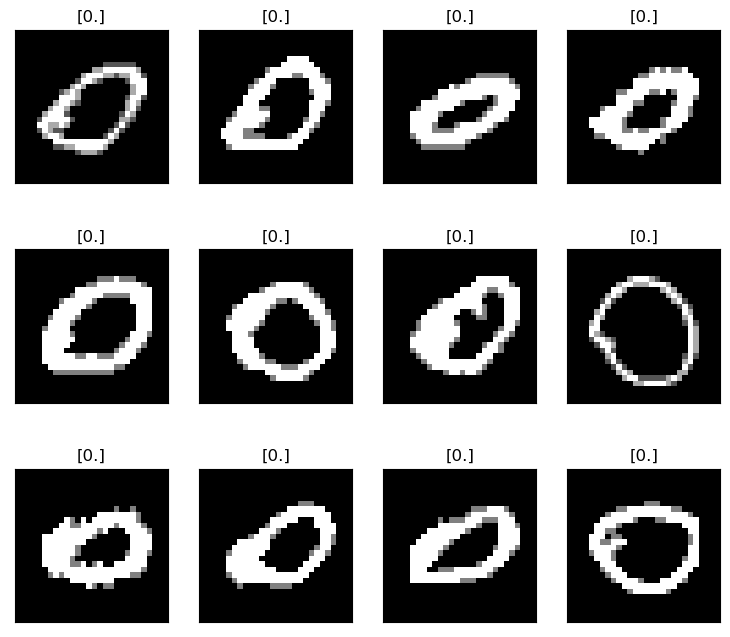

In [5]:
def plot_mnist(images, titles, h, w, n_row=3, n_col=4):
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.05)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)).T, cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

plot_mnist(X, y, h, w)

F1 score: 0.8276783535329846



              precision    recall  f1-score   support

         0.0       0.92      0.89      0.91      2085
         1.0       0.92      0.95      0.93      2352
         2.0       0.78      0.82      0.80      2077
         3.0       0.79      0.77      0.78      2174
         4.0       0.85      0.80      0.82      2025
         5.0       0.75      0.74      0.74      1924
         6.0       0.82      0.88      0.85      2091
         7.0       0.89      0.86      0.87      2189
         8.0       0.81      0.75      0.78      2036
         9.0       0.73      0.79      0.76      2047

    accuracy                           0.83     21000
   macro avg       0.83      0.83      0.83     21000
weighted avg       0.83      0.83      0.83     21000



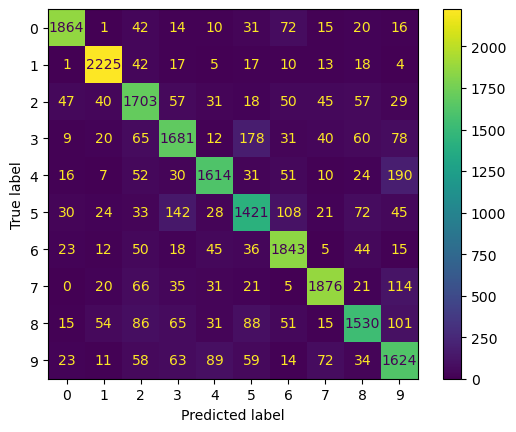

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

DEPTH = 10

dtc = tree.DecisionTreeClassifier(max_depth=DEPTH)
dtc.fit(X_train, y_train)

pred = dtc.predict(X_test)

f_score = f1_score(y_true=y_test, y_pred=pred, average='weighted')
print("F1 score: {}\n\n\n".format(f_score))

print(classification_report(y_test, pred))

cm = confusion_matrix(y_test, pred)
ConfusionMatrixDisplay(cm).plot()